# Titanic Analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Variable information:

**passengerid** = ID of passenger.<br>
**survived** = 1 if survived and 0 if not.<br>
**pclass** = The class, 1st is the best and 3rd the worst class.<br>
**name** = Passenger name<br>
**sex** = Passenger Sex (male or female).<br>
**age** = Passenger age.<br>
**sibsp** = Number of siblings and spouses on Titanic.<br>
**parch** = Number of parents / number of children.<br>
**ticket** = Ticket code.<br>
**fare** = Ticket fare (how much this person paid).<br>
**cabin** = Cabin code.<br>
**embarked** = The place where this person enbarked on Titanic.

In [2]:
train_df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.shape

(418, 11)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Passenger Id doesn't give any information we need, 'Name' can bring us some useful insights.

The column 'Cabin' have a lot of null values and generally would be dropped, but it can be used due to the ship structure, which can influenciate someone survival.

In [11]:
train_df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)

In [12]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [13]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


## Exploratory analysis:

In [14]:
sns.set_palette("icefire")
sns.set_context('talk')

      Sex  Survived
0  female  0.742038
1    male  0.188908


Text(0.5, 1.0, '# of survivors x Sex')

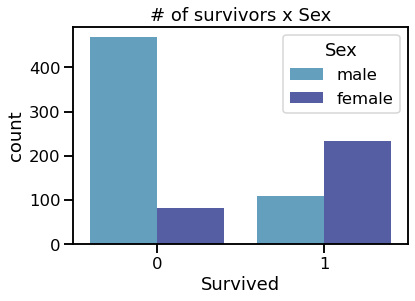

In [15]:
# Survivors x Sex
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.countplot(x = 'Survived', hue='Sex', data=train_df)
plt.title('# of survivors x Sex')

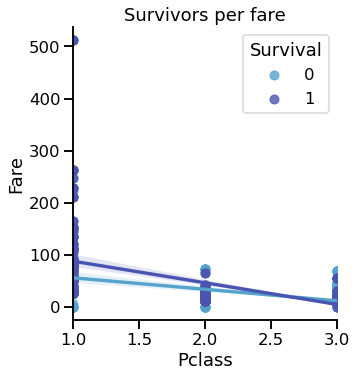

In [16]:
g = sns.lmplot(data=train_df, x='Pclass', y='Fare', hue='Survived', legend=False)
plt.legend()
plt.legend(['Dead', 'Alive'])
plt.title('Survivors per fare')
plt.legend().set_title('Survival')

Text(0.5, 1.0, 'Histogram of the families on Titanic')

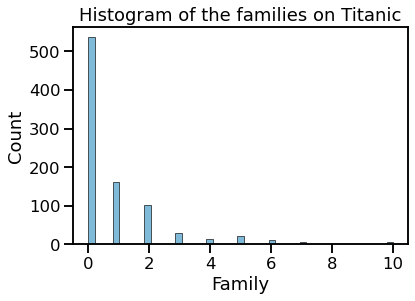

In [17]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
sns.histplot(data=train_df['Family'])
plt.title('Histogram of the families on Titanic')

Text(0.5, 1.0, 'The age of every Sex')

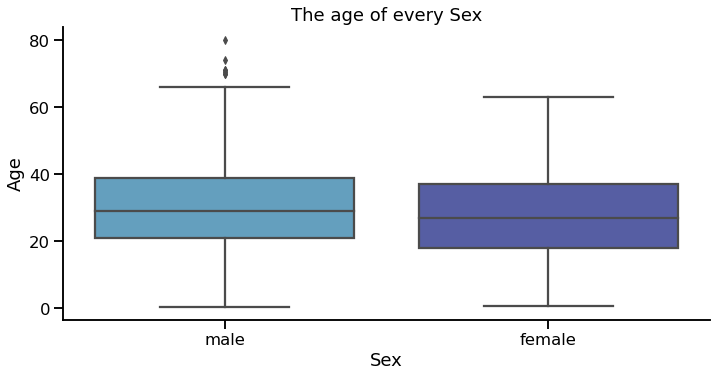

In [18]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, height = 5, aspect = 2)
plt.title('The age of every Sex')

In [19]:
print(train_df.pivot_table('Survived', index='Sex', columns='Pclass'))

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


/home/daniel/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


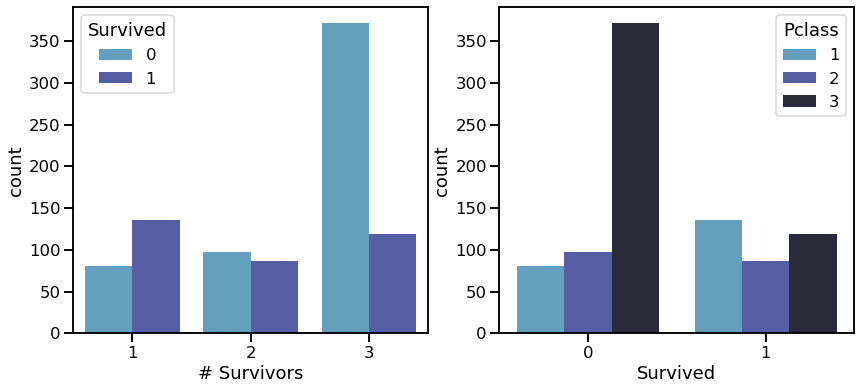

In [20]:
# Sobreviventes por classe
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,6))

sns.countplot(x='Pclass', hue='Survived', data=train_df, ax=axis1)
axis1.set_xlabel('Class')

sns.countplot('Survived', hue='Pclass', data=train_df, ax=axis2)
axis1.set_xlabel('# Survivors')

plt.show()

Text(0.5, 1.0, 'suvival and age at every Titanic class')

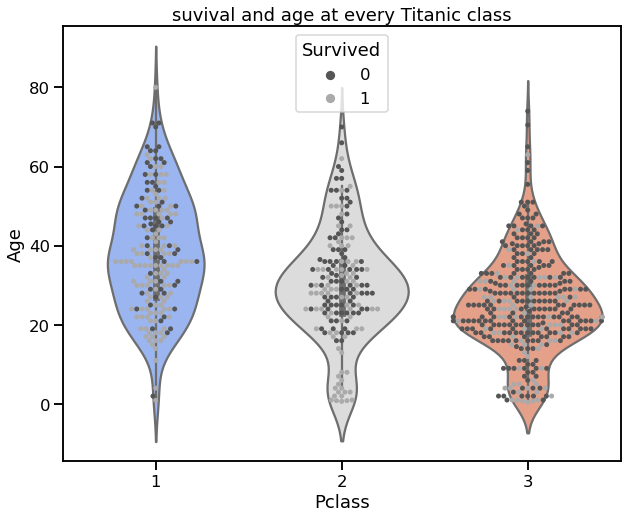

In [21]:
#the number of persons, Survival, Age and Pclass on Titanic
plt.figure(figsize=(10, 8))
sns.violinplot(data=train_df, x='Pclass', y='Age', palette='coolwarm')
sns.swarmplot(data=train_df, x='Pclass', y='Age', hue='Survived', palette='gray')
plt.title('suvival and age at every Titanic class')

## Transforming sex in binary column:

In [22]:
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1})

In [23]:
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.00,NaN,S,0
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.00,B42,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.45,NaN,S,3
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.00,C148,C,0
890,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,7.75,NaN,Q,0


## Analysing Embarked column:

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


Text(0.5, 1.0, '# of survivors in the harbours')

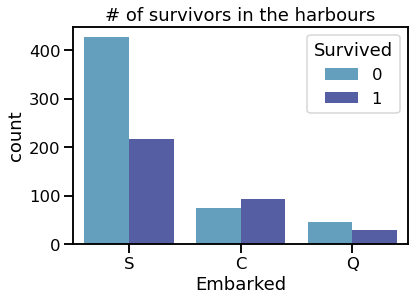

In [24]:
# Survivors x harbour
print(train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.countplot(data = train_df, x='Embarked', hue = 'Survived')
plt.title('# of survivors in the harbours')

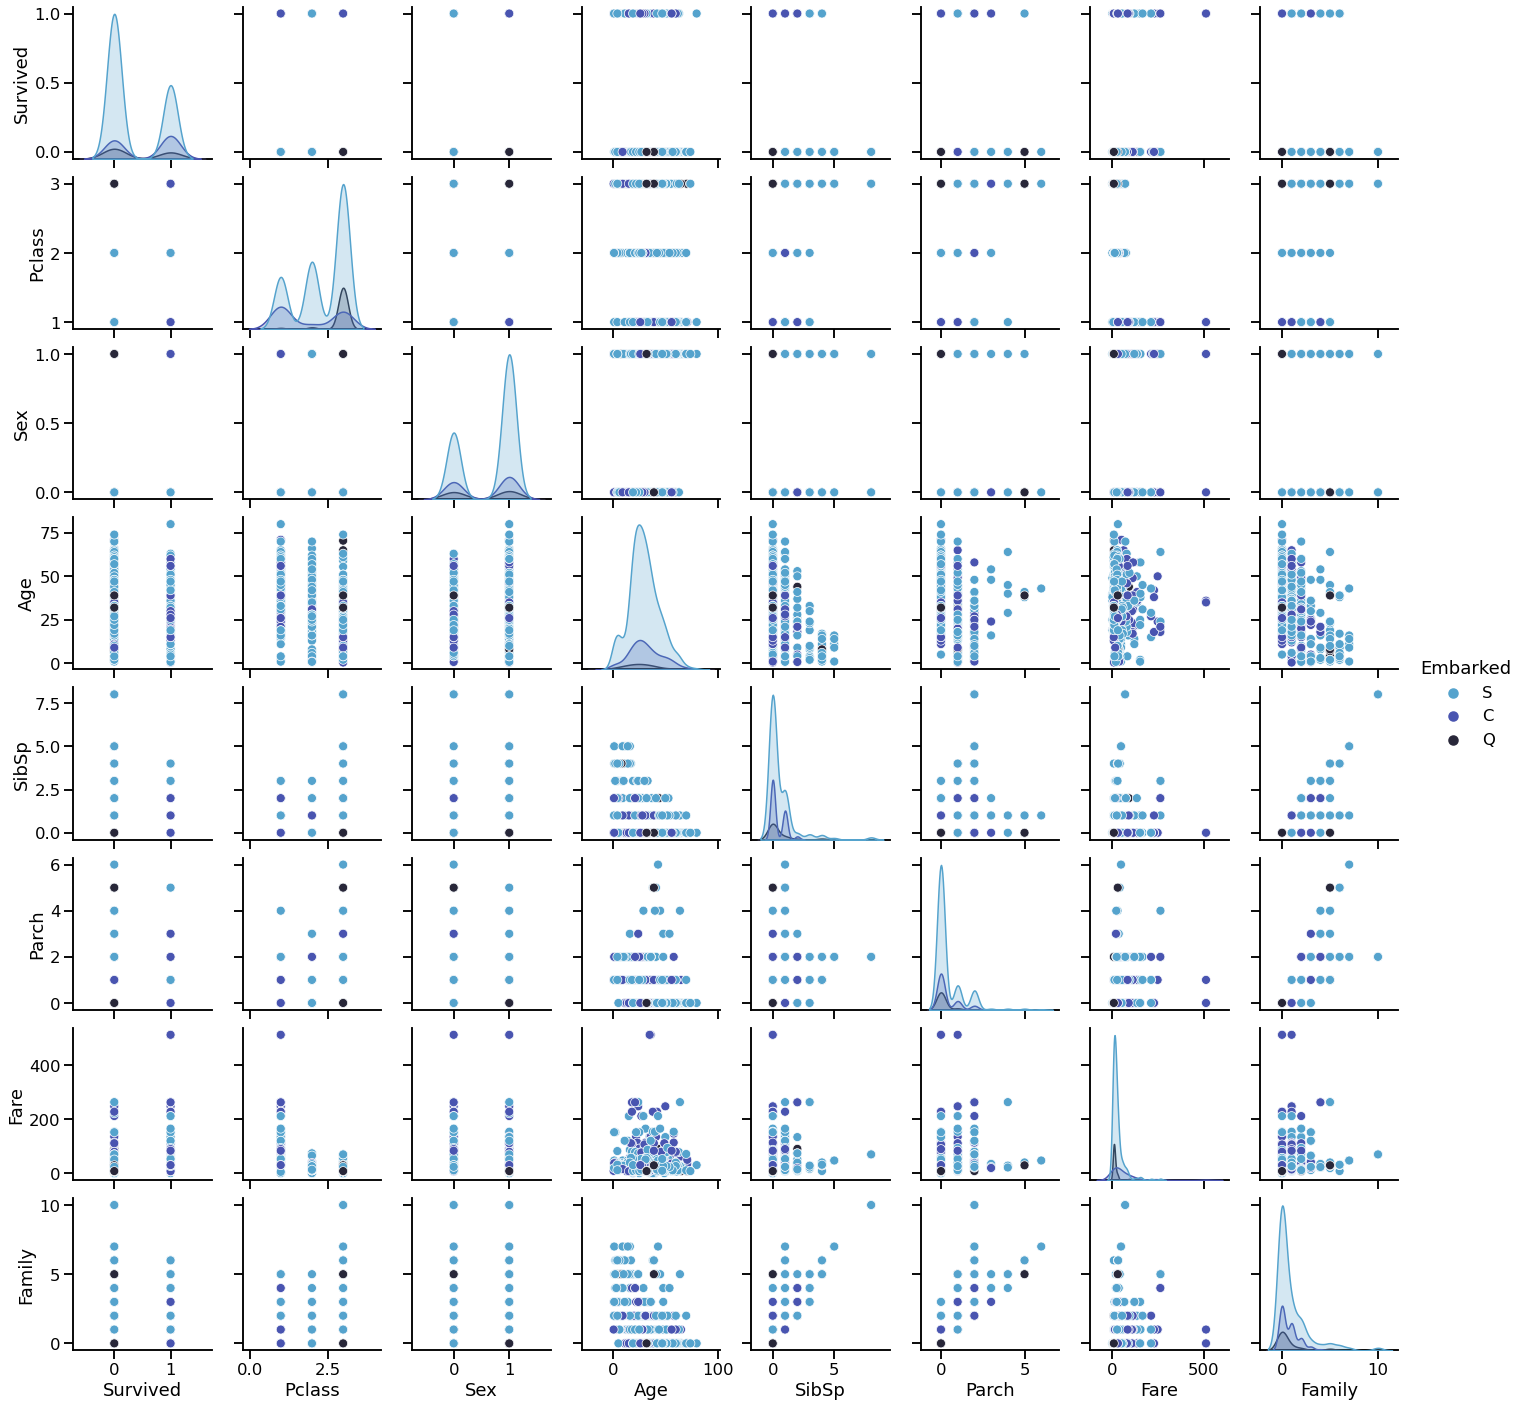

In [25]:
sns.pairplot(train_df, hue='Embarked')

We can't see any strong linearity

### Missing values in 'Embarked' column:

In [26]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
# Analysing "Embarked" values in test dataset
test_df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [28]:
# Finding the rows with missing values
train_df[train_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
61,1,1,"Icard, Miss. Amelie",0,38.0,0,0,80.0,B28,NaN,0
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,80.0,B28,NaN,0


We filled up with the mode.

In [29]:
train_df['Embarked'].fillna(train_df['Embarked'].mode().values[0], inplace=True)

In [30]:
train_df['Embarked'].isnull().sum()

0

Dummy encoding "embarked" column.



In [31]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix=['Emb'])
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix=['Emb'])

In [32]:
train_df.drop(columns=['Emb_Q'], axis=1, inplace=True)
test_df.drop(columns=['Emb_Q'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Family,Emb_C,Emb_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,1,1,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,1,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0,0,1


In [33]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Emb_C,Emb_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NaN,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NaN,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NaN,0,1


<AxesSubplot:>

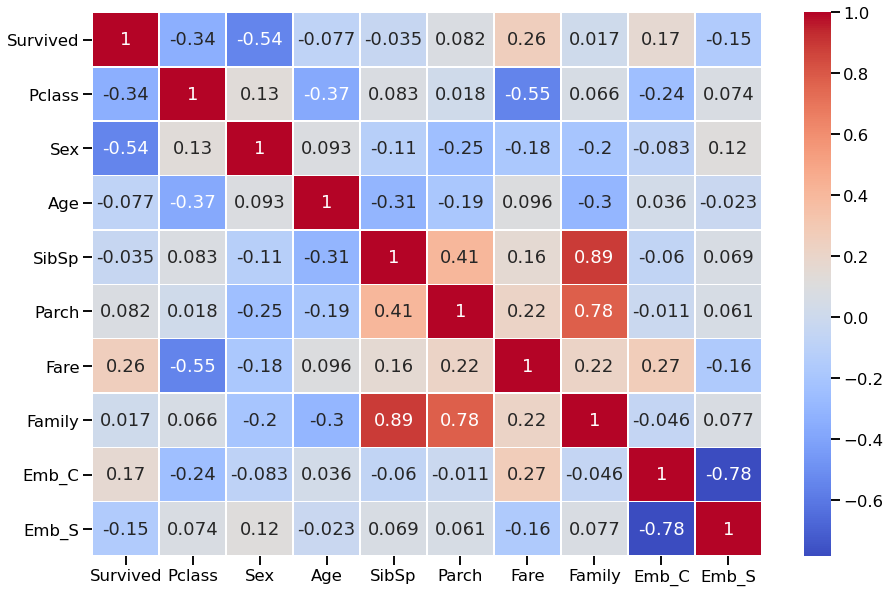

In [34]:
corr = train_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='coolwarm')

# Finding titles:

Everyone on Titanic had within the name a title which indicates if they're royal members, men/women, married or not, which are correlated to age.

In [35]:
#Uses regex to find titles
def findTitle(name):
    return re.findall("[\w]+\.", name)[0]

In [36]:
#Change some unnecessary title
def changeTitle(d):
    if(d['Title'] == 'Dr.'):
        return 'Dr'
    if(d['Sex'] == 1):
        if (d['Title'] in ['Mr.', 'Don.', 'Rev.', 'Major.', 'Sir.', 'Col.', 'Capt.', 'Jonkheer.']):
            return 'Mr'
        elif(d['Title'] in ['Master.']):
            return 'Master'
    if(d['Sex'] == 0):
        if (d['Title'] in ['Lady.', 'Ms.', 'Mrs.']):
            return 'Mrs'
        else:
            return 'Miss'

In [37]:
# Delete the rows
def formatDataSet(d):    
    
    d['Title'] = d['Name'].apply(findTitle)
    
    d["Deck"] = d["Cabin"].str.slice(0,1)
    d["Deck"].fillna('NA', inplace=True)
    
    d.drop('Cabin', axis=1, inplace=True)
    
    d.drop('Name', axis=1, inplace=True)
    
    return d

In [38]:
train_df = formatDataSet(train_df)

In [39]:
test_df = formatDataSet(test_df)

In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Emb_C,Emb_S,Title,Deck
0,0,3,1,22.0,1,0,7.2500,1,0,1,Mr.,NA
1,1,1,0,38.0,1,0,71.2833,1,1,0,Mrs.,C
2,1,3,0,26.0,0,0,7.9250,0,0,1,Miss.,NA
3,1,1,0,35.0,1,0,53.1000,1,0,1,Mrs.,C
4,0,3,1,35.0,0,0,8.0500,0,0,1,Mr.,NA


In [41]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_S,Title,Deck
0,892,3,1,34.5,0,0,7.8292,0,0,Mr.,NA
1,893,3,0,47.0,1,0,7.0000,0,1,Mrs.,NA
2,894,2,1,62.0,0,0,9.6875,0,0,Mr.,NA
3,895,3,1,27.0,0,0,8.6625,0,1,Mr.,NA
4,896,3,0,22.0,1,1,12.2875,0,1,Mrs.,NA


Text(0.5, 1.0, 'Titles on Titanic')

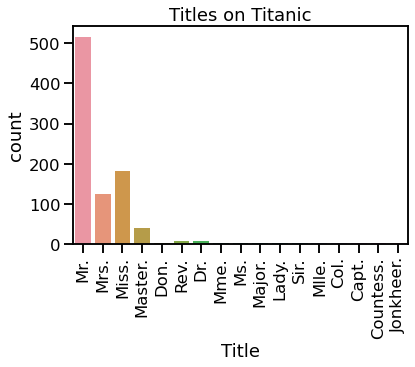

In [42]:
plt.xticks(rotation=90)
sns.countplot(data=train_df, x='Title')
plt.title('Titles on Titanic')

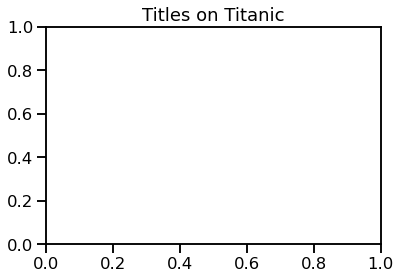

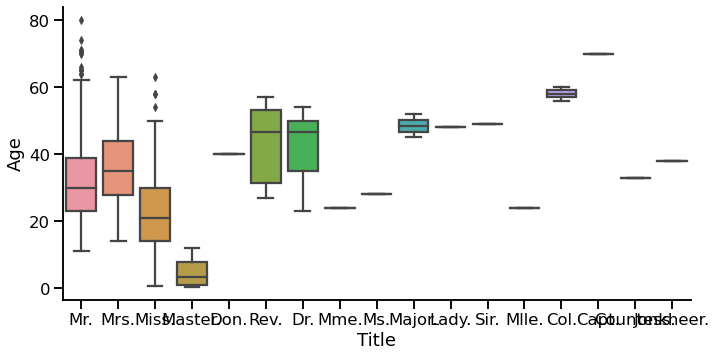

In [43]:
plt.title('Titles on Titanic')
sns.catplot(x = 'Title', y = 'Age', kind = 'box', data = train_df, height = 5, aspect = 2)

Text(0.5, 1.0, 'Títulos depois de mudar')

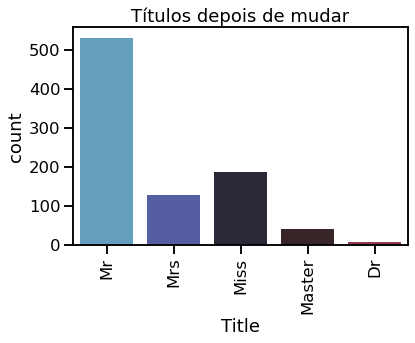

In [44]:
train_df['Title'] = train_df.apply(changeTitle, axis=1)
test_df['Title'] = test_df.apply(changeTitle, axis=1)
plt.xticks(rotation=90)
sns.countplot(data=train_df, x='Title')
plt.title('Títulos depois de mudar')

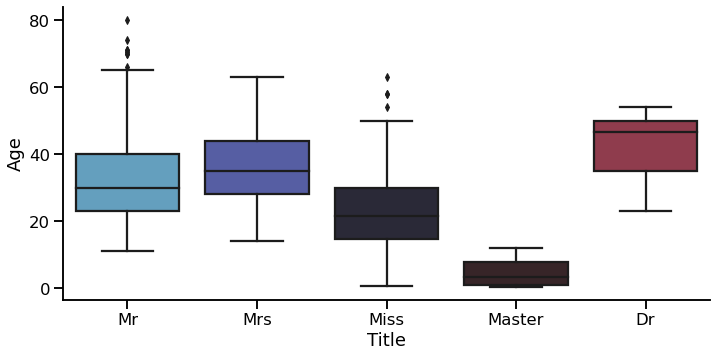

In [45]:
sns.catplot(x = 'Title', y = 'Age', kind = 'box', data = train_df, height = 5, aspect = 2)

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Emb_C,Emb_S,Title,Deck
0,0,3,1,22.0,1,0,7.2500,1,0,1,Mr,NA
1,1,1,0,38.0,1,0,71.2833,1,1,0,Mrs,C
2,1,3,0,26.0,0,0,7.9250,0,0,1,Miss,NA
3,1,1,0,35.0,1,0,53.1000,1,0,1,Mrs,C
4,0,3,1,35.0,0,0,8.0500,0,0,1,Mr,NA


In [47]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_S,Title,Deck
0,892,3,1,34.5,0,0,7.8292,0,0,Mr,NA
1,893,3,0,47.0,1,0,7.0000,0,1,Mrs,NA
2,894,2,1,62.0,0,0,9.6875,0,0,Mr,NA
3,895,3,1,27.0,0,0,8.6625,0,1,Mr,NA
4,896,3,0,22.0,1,1,12.2875,0,1,Mrs,NA


In [48]:
# Making "title" column encoding
train_df = pd.concat([train_df, pd.get_dummies(train_df['Title'])], axis=1)
train_df.drop('Title', axis=1, inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df['Title'])], axis=1)
test_df.drop('Title', axis=1, inplace=True)

# Making an Age regressor:

In [49]:
ageDf = train_df.copy()

In [50]:
ageDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Emb_C,Emb_S,Deck,Dr,Master,Miss,Mr,Mrs
0,0,3,1,22.0,1,0,7.2500,1,0,1,NA,0,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,1,0,C,0,0,0,0,1
2,1,3,0,26.0,0,0,7.9250,0,0,1,NA,0,0,1,0,0
3,1,1,0,35.0,1,0,53.1000,1,0,1,C,0,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1,NA,0,0,0,1,0


In [51]:
ageDf.drop(['Emb_C', 'Emb_S', 'Deck', 'Survived'], axis=1, inplace=True)

In [52]:
ageDf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Dr,Master,Miss,Mr,Mrs
0,3,1,22.0,1,0,7.2500,1,0,0,0,1,0
1,1,0,38.0,1,0,71.2833,1,0,0,0,0,1
2,3,0,26.0,0,0,7.9250,0,0,0,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,0,0,1,0


In [53]:
train = ageDf[ageDf['Age'].notna()]
target = ageDf[ageDf['Age'].isna()]

In [54]:
X_age = train.drop('Age', axis=1)
y_age = train['Age']

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [56]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, random_state=42, test_size=0.2)

In [57]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_age, y_train_age)
pred_1 = rf.predict(X_test_age)

In [58]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [59]:
r2 = r2_score(y_test_age, pred_1)
mae = mean_absolute_error(y_test_age, pred_1)

print(f'r2: {r2}\n mae: {mae}')

r2: 0.3485518666335544
 mae: 8.479635641684558


# Age filling:

In [60]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Emb_C,Emb_S,Deck,Dr,Master,Miss,Mr,Mrs
0,0,3,1,22.0,1,0,7.2500,1,0,1,NA,0,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,1,0,C,0,0,0,0,1
2,1,3,0,26.0,0,0,7.9250,0,0,1,NA,0,0,1,0,0
3,1,1,0,35.0,1,0,53.1000,1,0,1,C,0,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1,NA,0,0,0,1,0


In [61]:
train_df['Age_pred'] = rf.predict(train_df.drop(['Emb_C', 'Emb_S', 'Deck', 'Age', 'Survived'], axis=1))

In [62]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_S,Deck,Dr,Master,Miss,Mr,Mrs
0,892,3,1,34.5,0,0,7.8292,0,0,NA,0,0,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,1,NA,0,0,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,0,NA,0,0,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,1,NA,0,0,0,1,0
4,896,3,0,22.0,1,1,12.2875,0,1,NA,0,0,0,0,1


# Filing the Fare:

In [63]:
pclass_group = test_df.groupby('Pclass')

In [64]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_S,Deck,Dr,Master,Miss,Mr,Mrs
152,1044,3,1,60.5,0,0,NaN,0,1,NA,0,0,0,1,0


In [65]:
test_df['Fare'].fillna(pclass_group.describe()['Fare']['mean'][3], inplace=True)

In [66]:
train_df.drop(['Emb_C', 'Emb_S', 'Deck', 'Age', 'Survived'], axis=1).head()

,Pclass,Sex,SibSp,Parch,Fare,Family,Dr,Master,Miss,Mr,Mrs,Age_pred
0,3,1,1,0,7.2500,1,0,0,0,1,0,21.751806
1,1,0,1,0,71.2833,1,0,0,0,0,1,41.270000
2,3,0,0,0,7.9250,0,0,0,1,0,0,24.504548
3,1,0,1,0,53.1000,1,0,0,0,0,1,33.760667
4,3,1,0,0,8.0500,0,0,0,0,1,0,29.897686


In [67]:
test_df['Family'] = test_df['SibSp'] + test_df['Parch']

In [68]:
test_df['Age_pred'] = rf.predict(test_df.drop(['PassengerId', 'Emb_C', 'Emb_S', 'Deck', 'Age'], axis=1))

In [69]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Emb_C,Emb_S,Deck,Dr,Master,Miss,Mr,Mrs,Age_pred
0,0,3,1,22.0,1,0,7.2500,1,0,1,NA,0,0,0,1,0,21.751806
1,1,1,0,38.0,1,0,71.2833,1,1,0,C,0,0,0,0,1,41.270000
2,1,3,0,26.0,0,0,7.9250,0,0,1,NA,0,0,1,0,0,24.504548
3,1,1,0,35.0,1,0,53.1000,1,0,1,C,0,0,0,0,1,33.760667
4,0,3,1,35.0,0,0,8.0500,0,0,1,NA,0,0,0,1,0,29.897686


In [70]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_S,Deck,Dr,Master,Miss,Mr,Mrs,Family,Age_pred
0,892,3,1,34.5,0,0,7.8292,0,0,NA,0,0,0,1,0,0,23.736738
1,893,3,0,47.0,1,0,7.0000,0,1,NA,0,0,0,0,1,1,21.258333
2,894,2,1,62.0,0,0,9.6875,0,0,NA,0,0,0,1,0,0,32.180563
3,895,3,1,27.0,0,0,8.6625,0,1,NA,0,0,0,1,0,0,27.550000
4,896,3,0,22.0,1,1,12.2875,0,1,NA,0,0,0,0,1,2,31.960000


In [71]:
train_df[train_df['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Emb_C,Emb_S,Deck,Dr,Master,Miss,Mr,Mrs,Age_pred
5,0,3,1,NaN,0,0,8.4583,0,0,0,NA,0,0,0,1,0,23.911667
17,1,2,1,NaN,0,0,13.0000,0,0,1,NA,0,0,0,1,0,31.574810
19,1,3,0,NaN,0,0,7.2250,0,1,0,NA,0,0,0,0,1,32.755778
26,0,3,1,NaN,0,0,7.2250,0,1,0,NA,0,0,0,1,0,32.418236
28,1,3,0,NaN,0,0,7.8792,0,0,0,NA,0,0,1,0,0,20.671214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292,0,1,0,NA,0,0,0,1,0,25.191839
863,0,3,0,NaN,8,2,69.5500,10,0,1,NA,0,0,1,0,0,14.581000
868,0,3,1,NaN,0,0,9.5000,0,0,1,NA,0,0,0,1,0,26.367389
878,0,3,1,NaN,0,0,7.8958,0,0,1,NA,0,0,0,1,0,27.684499


In [72]:
train_df['Age'] = np.where(train_df['Age'].isnull(), train_df['Age_pred'], train_df['Age'])

In [73]:
test_df['Age'] = np.where(test_df['Age'].isnull(), test_df['Age_pred'], test_df['Age'])

In [74]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Family      0
Emb_C       0
Emb_S       0
Deck        0
Dr          0
Master      0
Miss        0
Mr          0
Mrs         0
Age_pred    0
dtype: int64

In [75]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Family      0
Emb_C       0
Emb_S       0
Deck        0
Dr          0
Master      0
Miss        0
Mr          0
Mrs         0
Age_pred    0
dtype: int64

In [76]:
# Master title help us to indicate which males are child
train_df.drop(['Dr', 'Miss', 'Mr', 'Mrs', 'Age_pred'], axis=1, inplace=True)
test_df.drop(['Dr', 'Miss', 'Mr', 'Mrs', 'Age_pred'], axis=1, inplace=True)

In [77]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Family',
       'Emb_C', 'Emb_S', 'Deck', 'Master'],
      dtype='object')

In [78]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_S,Deck,Master,Family
0,892,3,1,34.5,0,0,7.8292,0,0,NA,0,0
1,893,3,0,47.0,1,0,7.0000,0,1,NA,0,1
2,894,2,1,62.0,0,0,9.6875,0,0,NA,0,0
3,895,3,1,27.0,0,0,8.6625,0,1,NA,0,0
4,896,3,0,22.0,1,1,12.2875,0,1,NA,0,2


# Using decks:

The 1st class decks which are on superior levels and it may influence someone's survival chance.

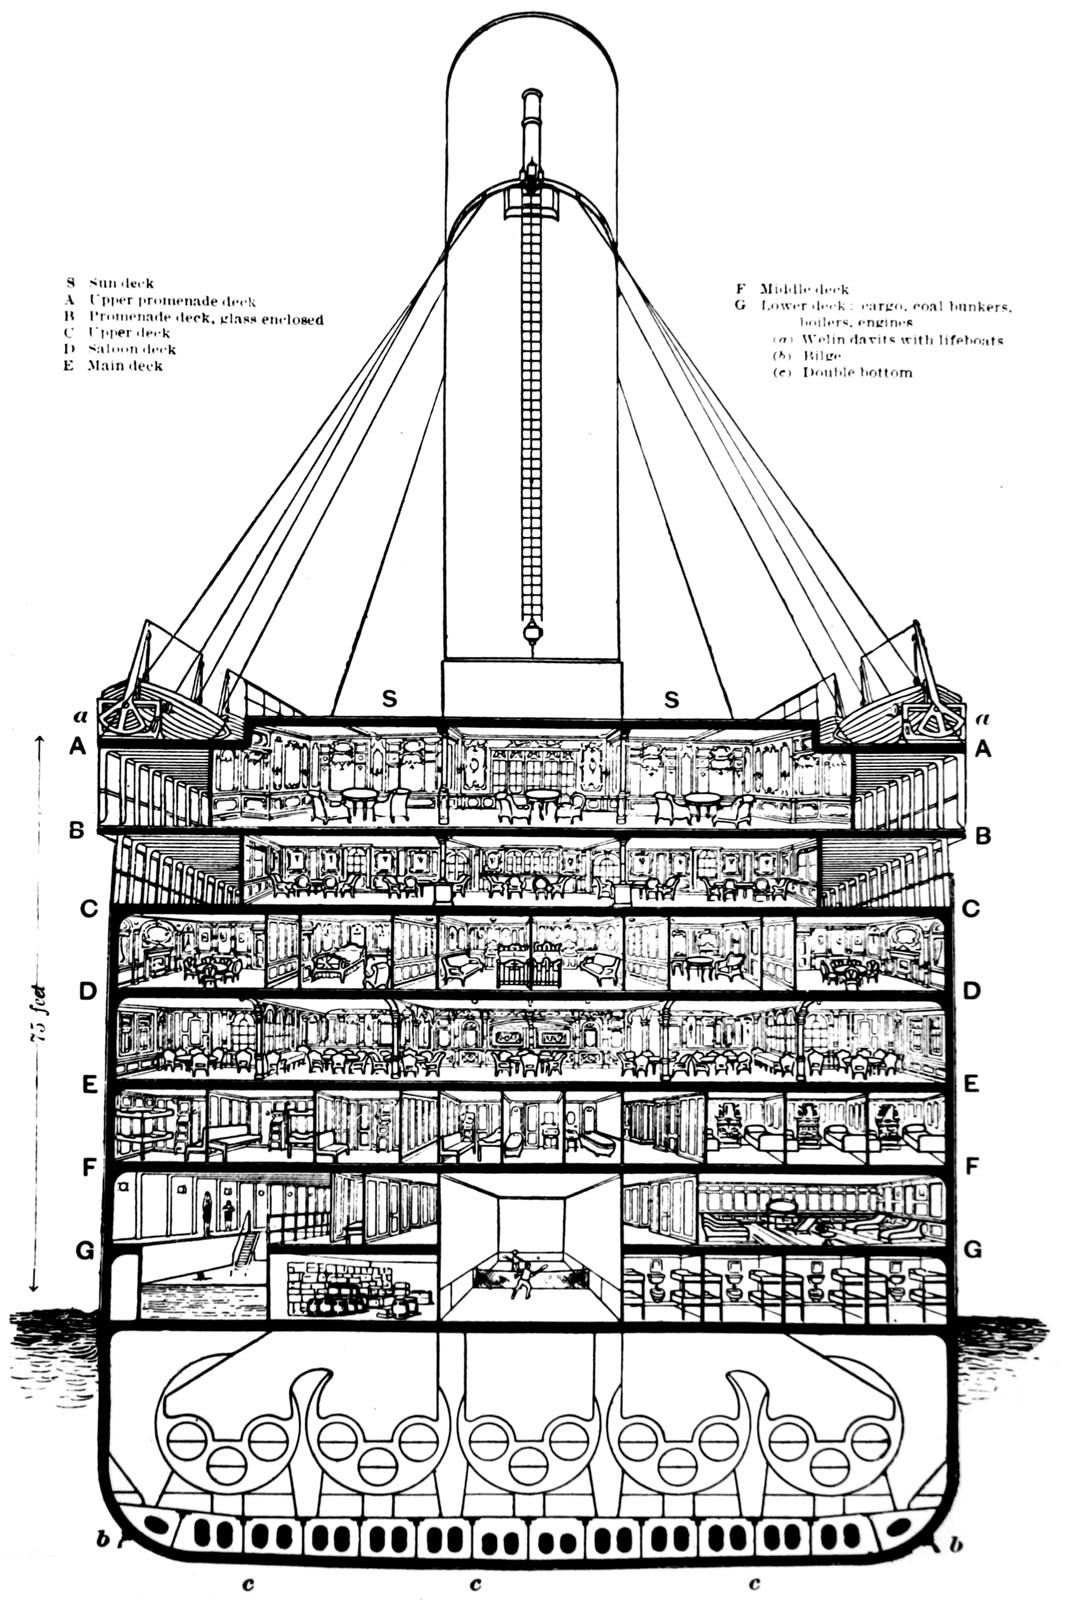

In [79]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Deck'], prefix='Deck')], axis=1)
train_df.drop('Deck', axis=1, inplace=True)

In [80]:
test_df = pd.concat([test_df, pd.get_dummies(test_df['Deck'], prefix='Deck')], axis=1)
test_df.drop('Deck', axis=1, inplace=True)

In [81]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Emb_C,Emb_S,Master,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_NA,Deck_T
0,0,3,1,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,0


In [82]:
train_df.drop('Deck_T', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Emb_C,Emb_S,Master,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_NA
0,0,3,1,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1


In [83]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_S,Master,Family,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_NA
0,892,3,1,34.5,0,0,7.8292,0,0,0,0,0,0,0,0,0,0,0,1
1,893,3,0,47.0,1,0,7.0000,0,1,0,1,0,0,0,0,0,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,0,0,0,0,0,0,0,0,0,0,1
3,895,3,1,27.0,0,0,8.6625,0,1,0,0,0,0,0,0,0,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,1,0,2,0,0,0,0,0,0,0,1


# Trainning model:

In [84]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Emb_C,Emb_S,Master,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_NA
0,0,3,1,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1


In [85]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# numerical features
num_cols = ['Fare', 'Age']

# apply standardization on numerical features
for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])
    
    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])
    
    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

<ipython-input-87-82028fc80565>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[i] = scale.transform(X_train[[i]])
<ipython-input-87-82028fc80565>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i] = scale.transform(X_test[[i]])
<ipython-input-87-82028fc80565>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [88]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Emb_C,Emb_S,Master,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_NA
331,1,1,1.161603,0,0,-0.078684,0,0,1,0,0,0,1,0,0,0,0,0
733,2,1,-0.469963,0,0,-0.377145,0,0,1,0,0,0,0,0,0,0,0,1
382,3,1,0.182664,0,0,-0.474867,0,0,1,0,0,0,0,0,0,0,0,1
704,3,1,-0.252421,1,0,-0.476230,1,0,1,0,0,0,0,0,0,0,0,1
813,3,0,-1.702701,4,2,-0.025249,6,0,1,0,0,0,0,0,0,0,0,1


In [89]:
# importando os classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [90]:
# Defining a function to run all classifiers:
def run_classifiers(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
     Script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: Dictionary of train, test and result sets
    '''
    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier(n_neighbors=7)),
          ('SVM', SVC()),
          ('SVM_Poly', SVC(kernel='poly')), 
          ('GNB', GaussianNB()),
          ('DecisionTree', DecisionTreeClassifier())]
    
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['1', '0']
    final = {}
    
    for model_name, model in models:
            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            final[model_name] = (model, X_train, y_train, X_test, y_pred)
            
            print(model_name)
            report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
            report_df = pd.DataFrame(report).transpose()
            display(report_df)
     
    return final

In [91]:
final = run_classifiers(X_train, y_train, X_test, y_test)

LogReg


,precision,recall,f1-score,support
1,0.854369,0.838095,0.846154,105.000000
0,0.776316,0.797297,0.786667,74.000000
accuracy,0.821229,0.821229,0.821229,0.821229
macro avg,0.815342,0.817696,0.816410,179.000000
weighted avg,0.822101,0.821229,0.821561,179.000000


RF


,precision,recall,f1-score,support
1,0.843137,0.819048,0.830918,105.000000
0,0.753247,0.783784,0.768212,74.000000
accuracy,0.804469,0.804469,0.804469,0.804469
macro avg,0.798192,0.801416,0.799565,179.000000
weighted avg,0.805976,0.804469,0.804995,179.000000


KNN


,precision,recall,f1-score,support
1,0.844037,0.876190,0.859813,105.000000
0,0.814286,0.770270,0.791667,74.000000
accuracy,0.832402,0.832402,0.832402,0.832402
macro avg,0.829161,0.823230,0.825740,179.000000
weighted avg,0.831737,0.832402,0.831641,179.000000


SVM


,precision,recall,f1-score,support
1,0.836364,0.876190,0.855814,105.000000
0,0.811594,0.756757,0.783217,74.000000
accuracy,0.826816,0.826816,0.826816,0.826816
macro avg,0.823979,0.816474,0.819515,179.000000
weighted avg,0.826124,0.826816,0.825802,179.000000


SVM_Poly


,precision,recall,f1-score,support
1,0.913043,0.800000,0.852792,105.000000
0,0.758621,0.891892,0.819876,74.000000
accuracy,0.837989,0.837989,0.837989,0.837989
macro avg,0.835832,0.845946,0.836334,179.000000
weighted avg,0.849204,0.837989,0.839184,179.000000


GNB


,precision,recall,f1-score,support
1,0.726562,0.885714,0.798283,105.00000
0,0.764706,0.527027,0.624000,74.00000
accuracy,0.737430,0.737430,0.737430,0.73743
macro avg,0.745634,0.706371,0.711142,179.00000
weighted avg,0.742331,0.737430,0.726233,179.00000


DecisionTree


,precision,recall,f1-score,support
1,0.876289,0.809524,0.841584,105.000000
0,0.756098,0.837838,0.794872,74.000000
accuracy,0.821229,0.821229,0.821229,0.821229
macro avg,0.816193,0.823681,0.818228,179.000000
weighted avg,0.826601,0.821229,0.822273,179.000000


In [92]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [93]:
std = StandardScaler()
X = std.fit_transform(X)
X = pd.DataFrame(X)

In [94]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [95]:
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [96]:
pass_id = test_df['PassengerId']
test_df.drop('PassengerId', axis=1, inplace=True)

In [97]:
test_df = std.fit_transform(test_df)
test_df = pd.DataFrame(test_df)

In [98]:
final_pred = model.predict(test_df)

In [99]:
final_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
predDf = pd.DataFrame(final_pred)

In [101]:
submission = pd.DataFrame()
submission['PassengerId'] = pass_id
submission['Survived'] = predDf[0]

In [102]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [103]:
submission.to_csv('submission.csv', index=False)